In [16]:
from muler.igrins import IGRINSSpectrum
from muler.hpf import HPFSpectrum

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import os
import warnings

import astropy.units as u
# from astropy.io import ascii
# from astropy.io import fits
# from astropy.table import Table, Column, join
# from astropy.wcs import WCS
from astropy.modeling import models, fitting

from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.fitting import fit_generic_continuum, fit_continuum, fit_lines, find_lines_threshold
from specutils.analysis import equivalent_width
from specutils.manipulation import noise_region_uncertainty

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config Completer.use_jedi = False

In [17]:
# path = 'A:/Documents/Grad_School/Research/igrins_reduced/20161101/'
# filename = 'SDCK_20161101_0062.spec_a0v.fits'
# spec = IGRINSSpectrum(file=path+filename)

# Reduced data in txt files
data_path = "A:/Documents/Grad_School/Research/IGRINS_Merged/"
# File path for figures to live in
fig_path = "A:/Documents/Grad_School/IGRINS-Spectra/IGRINS_figs/standards_spectra/"

# Create the folder if it doesn't exist
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# Nicole's merged K-band spectra of some Taurus Standards
merged_standard_files = glob.glob(data_path+"merged_standards/m*.txt")

# NIR Lines in micron
nir_dict = {
    "Fe-2.084": 2.084,
    "Si-2.092"	:	2.092,
    "Mg-2.106"	:	2.106,
    "Al-2.11"	:	2.11,
    "Ca-2.2035"	:	2.2035,
    "Fe-2.2037"	:	2.2037,
    "Sc-2.2052"	:	2.2052,
    "Na-2.2052"	:	2.2052,
    "Si-2.2063"	:	2.2063,
    "Sc-2.2065"	:	2.2065,
    "Si-2.2073"	:	2.2073,
    "Fe-2.2079"	:	2.2079,
    "Na-2.2083"	:	2.2083,
    "Ca-2.2113"	:	2.2113,
    "Br-Gamma"  :   2.1655,
    "Ti-2.2218"	:	2.2218,
    "Ti-2.224"	:	2.224,
    "Fe-2.226"	:	2.226,
    "Ti-2.228"	:	2.228,
    "Ti-2.232"	:	2.232,
    "Ca-2.26573"	:	2.26573,
    "Fe-2.2742"	:	2.2742,
    "Mg-2.281"	:	2.281,
    "Ca-2.2825"	:	2.2825,
    "Fe-2.284"	:	2.284,
    "Ti-2.29"	:	2.29,
    "Ti-2.297"	:	2.297
}
    # "CO(2-0)-2.29353" :	2.29353,
    # "CO(2-0)-2.32265"	:	2.32265,
    # "CO(2-0)-2.34327" :	2.34327,
    # "CO(2-0)-2.34531" :	2.34531,
    # "CO(2-0)-2.3495" 	:	2.3495,
    # "CO(2-0)-2.35167"	:	2.35167,
    # "CO(2-0)-2.35246" :	2.35246,
    # "CO(2-0)-2.38295" :	2.38295,
    # }

# Strings of the Nir lines
lines_str = list(nir_dict.keys())

# Wavelength values for each NIR line
lines_wav = list(nir_dict.values())

In [18]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

In [33]:
# Pandas Column IDs
igrins_cols = ['Wavelength', 'Flux', 'SNR','zero']

# Anon 1
anon1_df = pd.read_csv(merged_standard_files[0], delimiter='\s+', comment='#', names = igrins_cols)
# SNR column is an object for some reason, change to float
anon1_df['SNR'] = anon1_df['SNR'].astype(float)

# No negative flux and require SNR > 5
#  & (anon1_df['SNR'] < 10000)
anon1_df = anon1_df[(anon1_df['Wavelength'] > 2.) & (anon1_df['Flux'] > 0.4e6) & (anon1_df['SNR'] > 5) & (anon1_df['SNR'] < 10000)] 

# Wavelength + Flux Arrays
anon1_wavlen = anon1_df['Wavelength']
anon1_flux = anon1_df['Flux']

In [39]:
# Continuum model
anon1_contfit = fit_generic_continuum(anon1_spec)
# Continuum flux
anon1_cont = anon1_contfit(anon1_spec.spectral_axis)

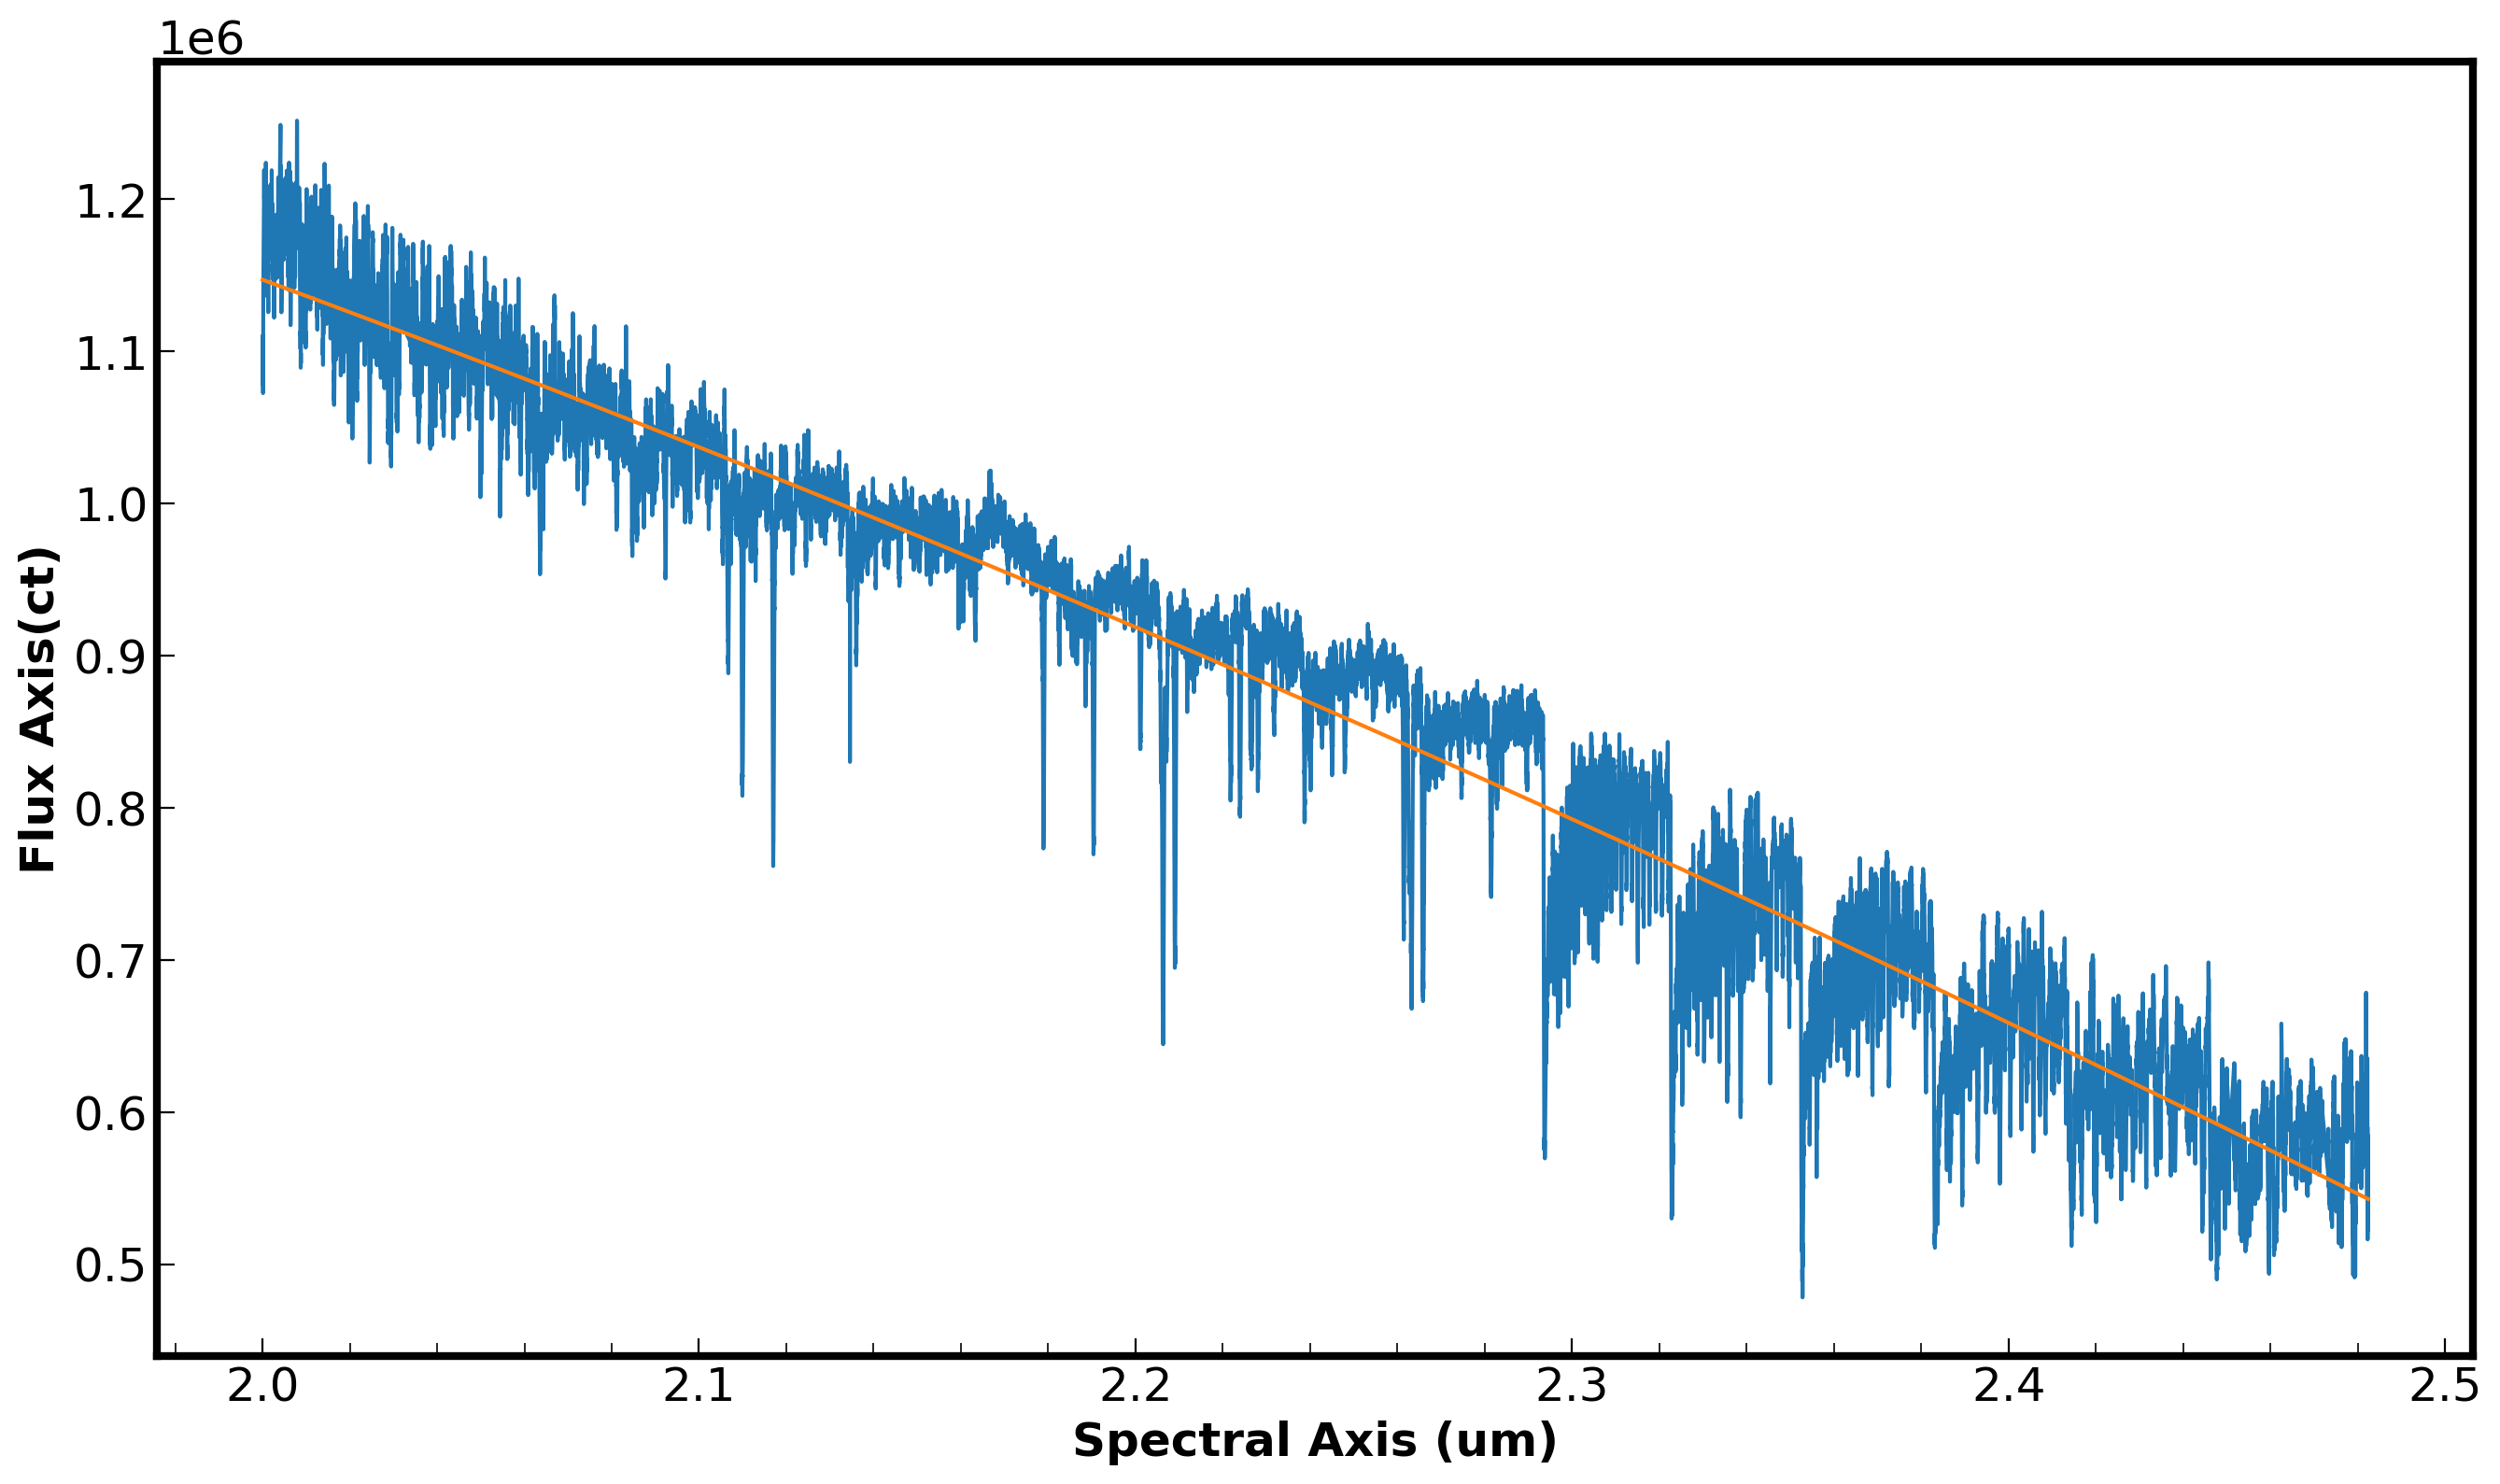

In [40]:
# Make 1D Spectrum Object
anon1_spec = Spectrum1D(spectral_axis=anon1_wavlen.values*u.um,flux=anon1_flux.values*u.ct)
fig,ax = plt.subplots(figsize=(16,9))
plt.plot(anon1_spec.spectral_axis, anon1_spec.flux)
plt.plot(anon1_spec.spectral_axis, anon1_cont)

# plt.xlim(2.22,2.235)
# plt.ylim(0.7e6,1e6)
plt.xlabel('Spectral Axis ({})'.format(anon1_spec.spectral_axis.unit)) 

plt.ylabel('Flux Axis({})'.format(anon1_spec.flux.unit)) 
 
plt.show()

# Try to do some continuum fitting
Want to fit a local continuum to get equivalent widths

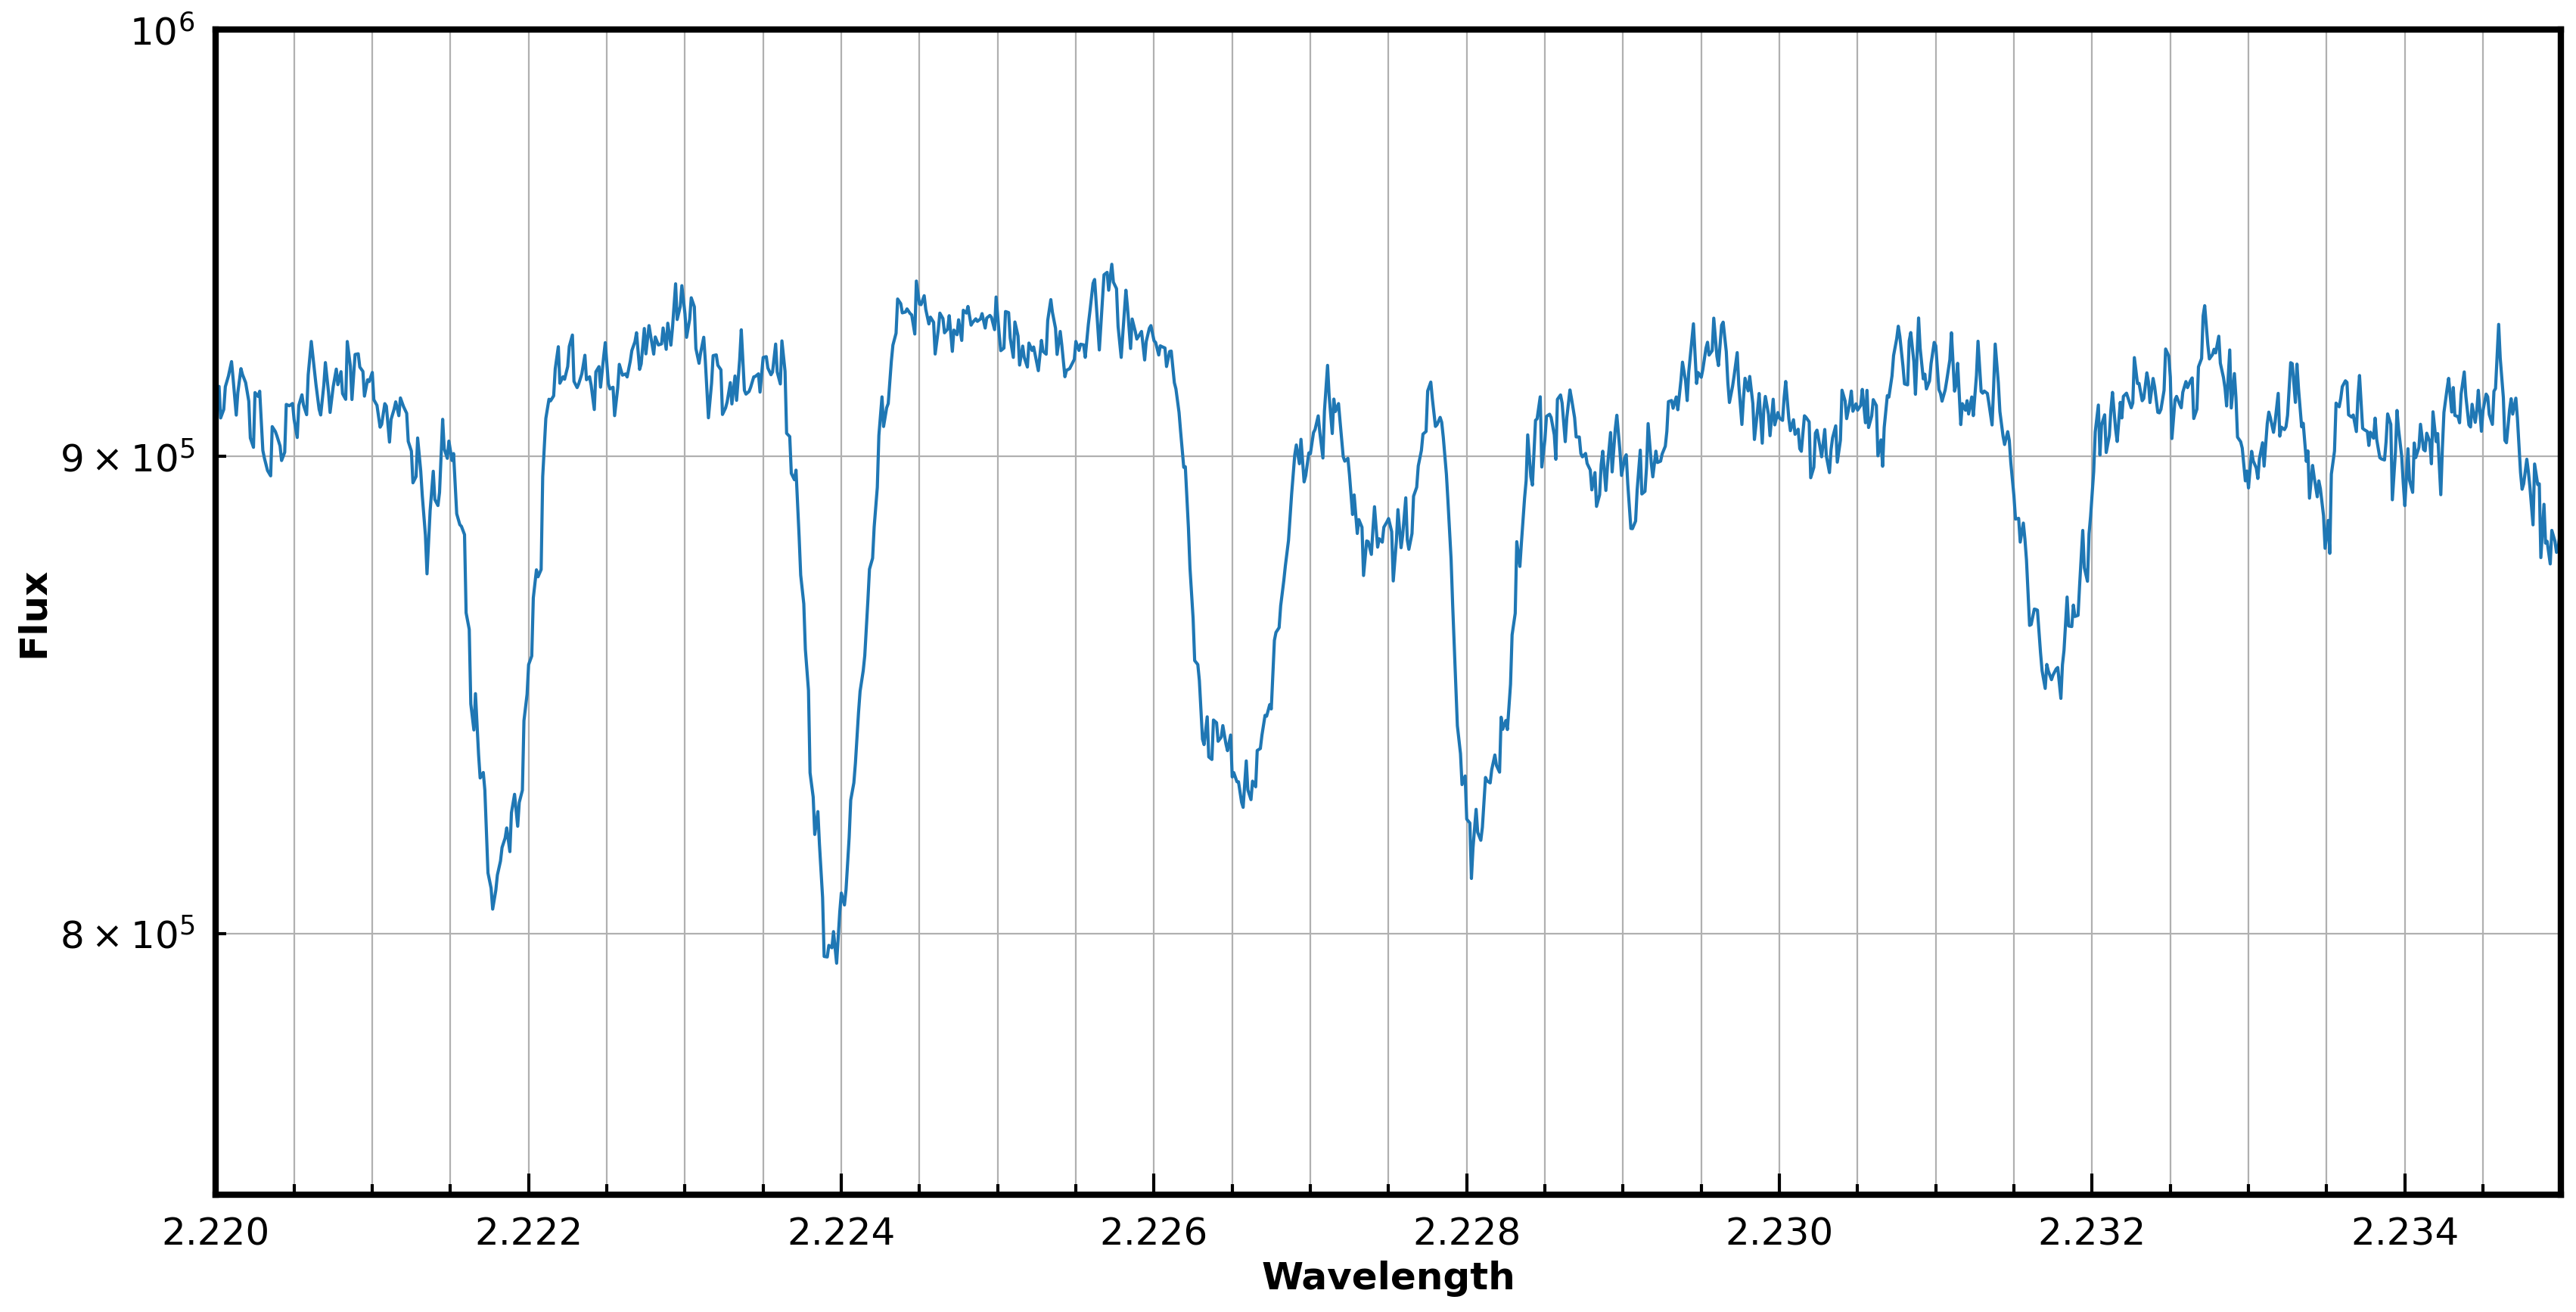

In [24]:
fig,ax = plt.subplots(figsize=(20,10))

plt.plot(anon1_spec.spectral_axis, anon1_spec.flux)

ax.set_xlim(2.22,2.235)
ax.set_ylim(7.5e5,1e6)
ax.set_yscale('log')
# ax.set_xscale('log')

# Enable minor tick marks
ax.minorticks_on()
ax.tick_params(axis='both', which='major', width=1.5, length=10, pad=10)
ax.tick_params(axis='both', which='minor', width=1.5, length=5, pad=10)

plt.xlabel('Wavelength')
plt.ylabel('Flux')
ax.grid(which='both')
plt.show()

In [25]:
# Define spectral regions we want to exclude from the continuum fit
reg1 = SpectralRegion(2.2215*u.micron,2.2223*u.micron)
reg2 = SpectralRegion(2.2235*u.micron,2.2243*u.micron)
reg3 = SpectralRegion(2.226*u.micron,2.2269*u.micron)
reg4 = SpectralRegion(2.2272*u.micron,2.2277*u.micron)

region = (2.22,2.235)*u.um
region_mask = (anon1_spec.spectral_axis >= region[0]) & (anon1_spec.spectral_axis <= region[1])


with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    cont_fit = fit_continuum(anon1_spec,window=(2.22,2.235)*u.um,exclude_regions=[reg1,reg2,reg3,reg4])


continuum_fitted = cont_fit(anon1_spec.spectral_axis)

anon1_norm_flux = anon1_spec.flux/continuum_fitted

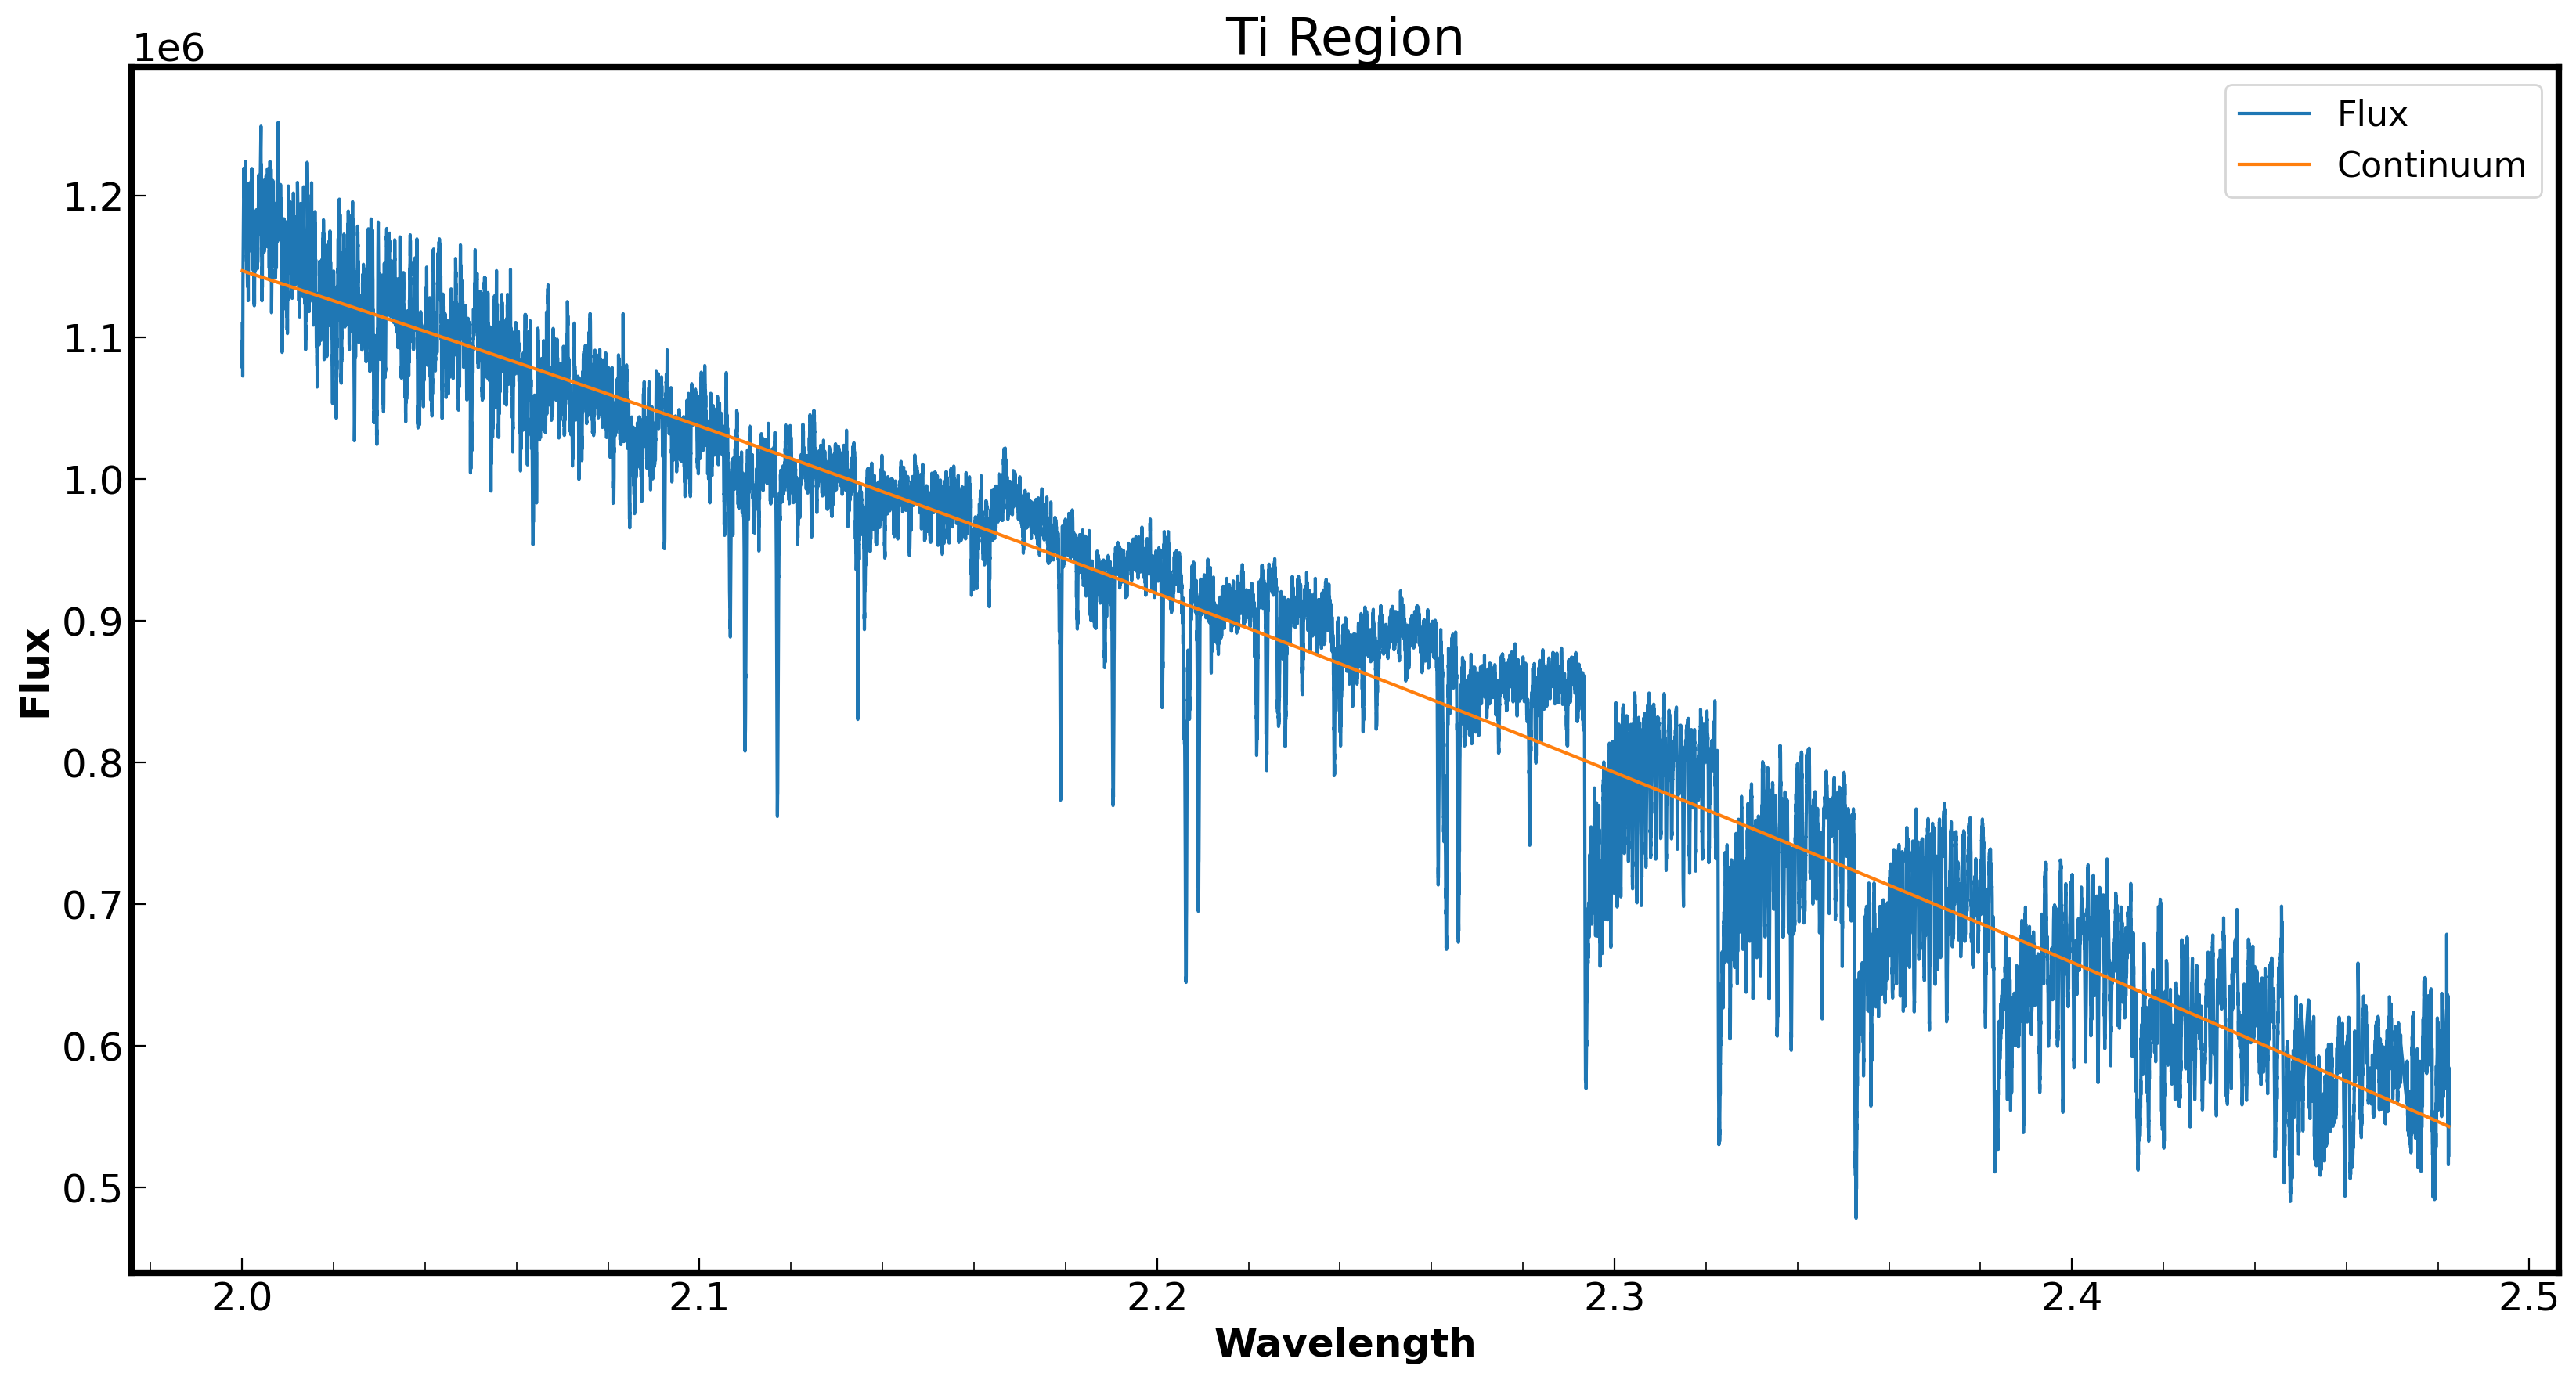

In [26]:
# Make a plot
fig,ax = plt.subplots(figsize=(20,10))

# plt.plot(anon1_spec.spectral_axis, anon1_spec.flux,label='Flux')
# plt.plot(anon1_spec.spectral_axis, anon1_spec.flux/continuum_fitted,label='Continuum Normalized Flux')
# plt.plot(anon1_spec.spectral_axis,continuum_fitted,label='Continuum')

# ax.set_xlim(2.22,2.235)
# ax.set_ylim(7.5e5,1e6)

# ax.set_yscale('log')

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Ti Region')
plt.legend()
plt.show()

In [27]:
anon1_norm_spec = Spectrum1D(spectral_axis=anon1_spec.spectral_axis[region_mask], flux=anon1_norm_flux[region_mask]*u.ct)

In [28]:
# Spectral Region
# sr = SpectralRegion(2.22*u.um,2.235*u.um)
sr = SpectralRegion(2.2216*u.um,2.2221*u.um)
# Equivalent Width
ew = equivalent_width(anon1_spec,regions=sr)
ew

<Quantity -422.68645245 um>

In [29]:
continuum_fitted

<Quantity [1146896.54110953, 1146886.02072692, 1146875.39504921, ...,
            542990.62809961,  542976.27622738,  542961.92428619] ct>

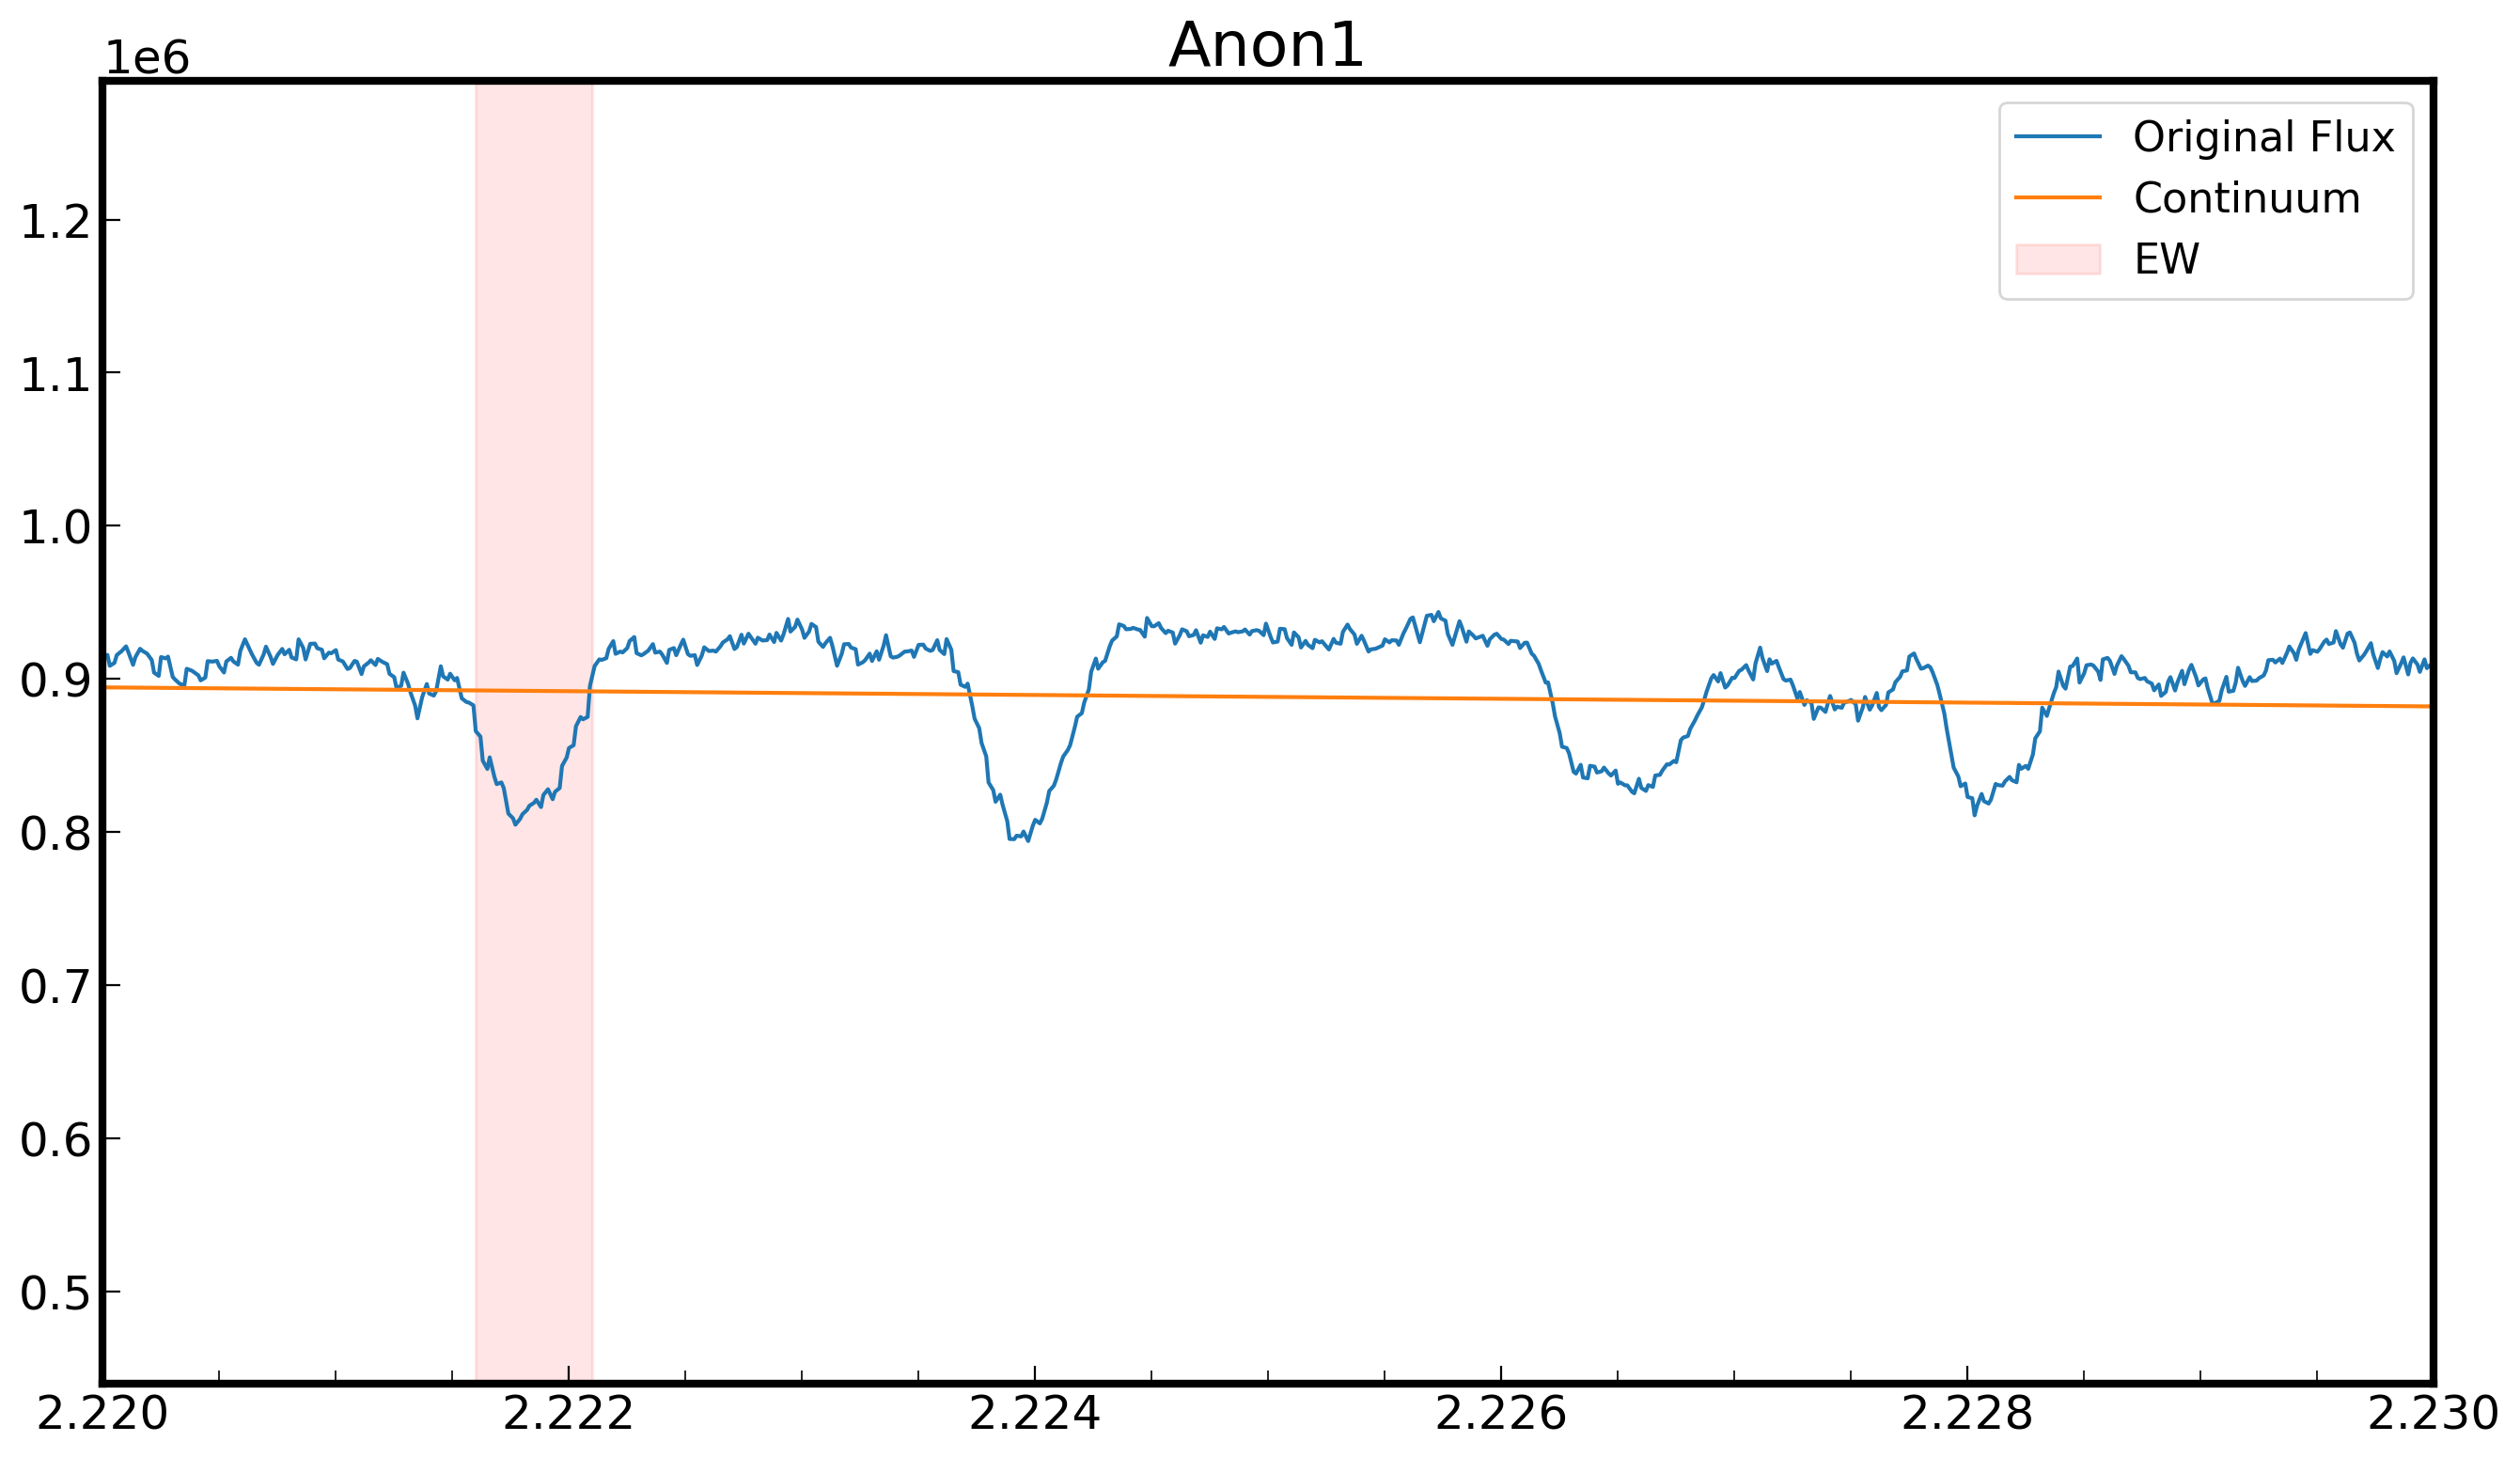

In [30]:
anon1_norm_spec = Spectrum1D(spectral_axis=anon1_wavlen.values*u.um,flux=anon1_norm_flux)
norm_cont = continuum_fitted/continuum_fitted.max()*u.ct

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(anon1_spec.spectral_axis,anon1_spec.flux,label='Original Flux')
# ax.plot(anon1_spec.spectral_axis[region_mask],anon1_norm_flux,label='Normalized Flux')
# ax.plot(anon1_norm_spec.spectral_axis,anon1_norm_spec.flux,label='Normalized Flux')
ax.plot(anon1_spec.spectral_axis[region_mask],continuum_fitted[region_mask],label='Continuum')

# Draw the Equivalent Width box for my amusement
ax.axvspan(2.2216,2.2221,alpha=0.1,color='red',label='EW')

# plt.text(x_position, y_position, f"Equivalent Width: {eq_width.value:.2f} {eq_width.unit}", fontsize=12)
# ax.text(2.2216,2.2221,f"Equivalent Width: {ew.value:.2f}{ew.unit}")

ax.set_xlim(2.22,2.23)
# ax.set_ylim(0.8,1.1)
ax.set_title('Anon1')
plt.legend()

# Save plot as PNG
plt.savefig("A:/Documents/Grad_School/IGRINS-Spectra/IGRINS_figs/standards_spectra/anon1_cont.png")
# Show the Plot
plt.show()

<!-- # Tom IDL Code
f1=f1+veil1[0]*median(f1[where(w1 ge 2.08 and w1 le 2.37)])

f2=f2+veil1[1]*median(f2[where(w2 ge 2.08 and w2 le 2.37)])

f3=f3+veil1[2]*median(f3[where(w3 ge 2.08 and w3 le 2.37)])

f4=f4+veil1[3]*median(f4[where(w4 ge 2.08 and w4 le 2.37)])

f5=f5+veil1[4]*median(f5[where(w5 ge 2.08 and w5 le 2.37)])

f6=f6+veil1[5]*median(f6[where(w6 ge 2.08 and w6 le 2.37)]) -->

In [22]:
noise_region = SpectralRegion(0*u.um, 3*u.um)

spectrum = noise_region_uncertainty(anon1_spec, noise_region)


lines = find_lines_threshold(spectrum, noise_factor=3)  

lines[lines['line_type'] == 'emission']



If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


line_center,line_type,line_center_index
um,,
float64,str8,int64
2.0079,emission,411
2.37217,emission,25118
2.38322,emission,25848
2.40767,emission,27298
2.4144101,emission,27736
2.41448,emission,27741
2.4193101,emission,28001
2.4458201,emission,29534
